## Python in Quantitative Finance

by; Mehdi Zallaghi

#### Set Up Your Environment

First, install the necessary libraries. 

You can use the following pip commands to install the packages you'll need:

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as stats
import statsmodels.api as sm
import cvxpy as cp

In [10]:
# Download data for Apple (AAPL) from Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2025-01-01')

# Display the first few rows of the data
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200
2020-01-07,72.065163,72.671356,71.845385,72.415353,108872000
2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200


In [11]:
# Save the downloaded data to a CSV file
data.to_csv('AAPL_Data.csv')

print("Data saved to 'AAPL_Data.csv'")


Data saved to 'AAPL_Data.csv'


In [12]:
# Load the data from the CSV file
data_loaded = pd.read_csv('AAPL_Data.csv', index_col=0, parse_dates=True)

# Display the first few rows
data_loaded.head()

C:\Users\MZA4\AppData\Local\Temp\ipykernel_8472\3820358737.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_loaded = pd.read_csv('AAPL_Data.csv', index_col=0, parse_dates=True)


,Close,High,Low,Open,Volume
Price,,,,,
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,NaN,NaN,NaN,NaN,NaN
2020-01-02,72.53851318359375,72.59889150198023,71.29230380764884,71.54588979671196,135480400
2020-01-03,71.83329010009766,72.59405542623057,71.60868452797844,71.76566667933918,146322800
2020-01-06,72.40568542480469,72.4443284378041,70.70301958367426,70.9541954829699,118387200


#### Calculate Returns

Financial analysis often involves calculating returns. We’ll calculate the log returns, which are commonly used for financial modeling.

Calculate Log Returns

Log returns are calculated as:

In [13]:
# Calculate daily log returns
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))

# Display the first few rows of returns
data[['Close', 'Log_Returns']].head()

Price,Close,Log_Returns
Ticker,AAPL,
Date,,
2020-01-02,72.538513,NaN
2020-01-03,71.833290,-0.009770
2020-01-06,72.405685,0.007937
2020-01-07,72.065163,-0.004714
2020-01-08,73.224403,0.015958


### Plot Stock Price and Returns

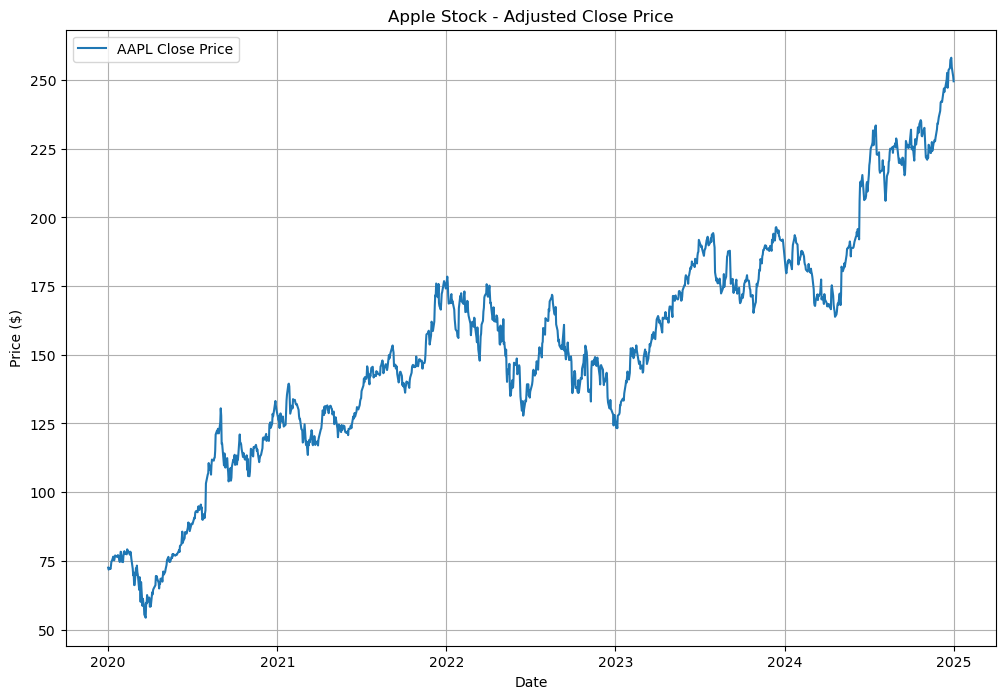

In [14]:
# Plot Adjusted Close Price
plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label='AAPL Close Price')
plt.title('Apple Stock - Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

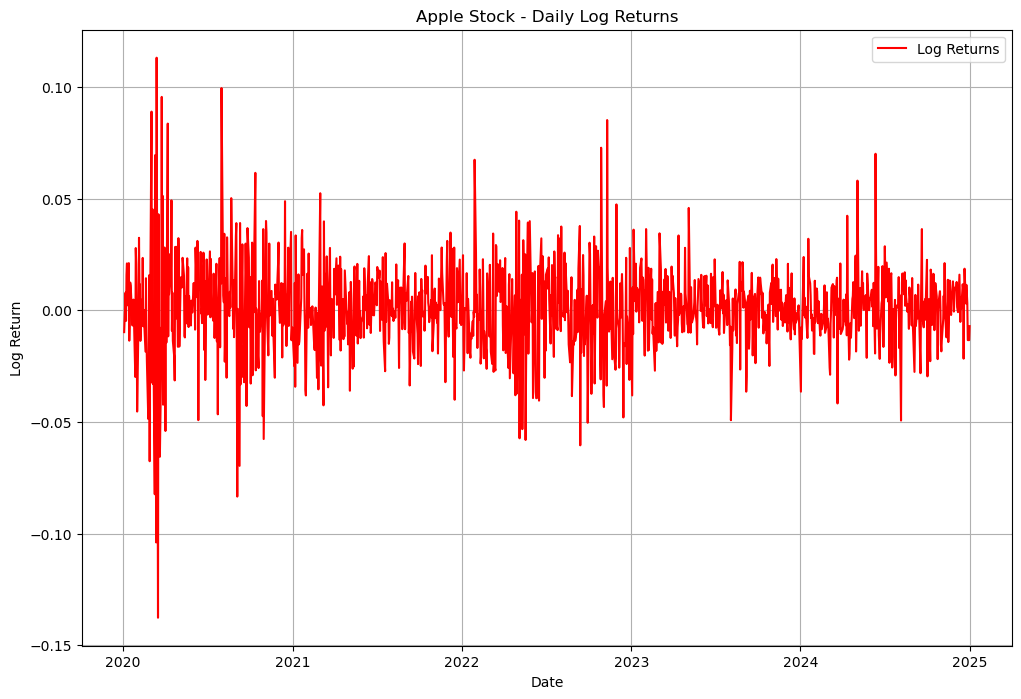

In [23]:
# Plot Log Returns
plt.figure(figsize=(12, 8))
plt.plot(data['Log_Returns'], label='Log Returns', color='red')
plt.title('Apple Stock - Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.show()

### Risk and Performance Metrics

Calculate key performance and risk metrics like Volatility and Sharpe Ratio

##### Calculate Volatility

Volatility is a measure of how much the price of an asset fluctuates. 

We will calculate Annualized Volatility based on the daily log returns.

- Calculate annualized volatility (assuming 252 trading days in a year)

In [24]:
volatility = data['Log_Returns'].std() * np.sqrt(252)
print(f"Annualized Volatility: {volatility:.2%}")

Annualized Volatility: 31.65%


#### Sharpe Ratio 
The Sharpe Ratio measures the risk-adjusted return.

In [25]:
sharpe_ratio = data['Log_Returns'].mean() / data['Log_Returns'].std() * np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 0.78
